In [14]:
import pandas as pd
import numpy as np
import pickle
from sklearn import tree
from sklearn import metrics
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_graphviz
load_path = '/home/akash/greyatom/Hackathon_1/Portuguese_Bank/data/processed/'
user_data_dir = '/home/akash/greyatom/Hackathon_1/Portuguese_Bank/reports/figures/'

In [15]:
load_path_X_train = load_path + 'X_train.csv'
X_train = pd.read_csv(load_path_X_train,index_col=0)

load_path_X_test = load_path + 'X_test.csv'
X_test = pd.read_csv(load_path_X_test,index_col=0)

load_path_Y_train = load_path + 'y_train.csv'
y_train = pd.read_csv(load_path_Y_train,header=None)

load_path_Y_test = load_path + 'y_test.csv'
y_test = pd.read_csv(load_path_Y_test,header=None)

In [16]:
y_train = pd.Series(np.array(y_train[1]), index=np.array(y_train[0]))
y_test = pd.Series(np.array(y_test[1]), index=np.array(y_test[0]))

In [17]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3295, 10) (824, 10) (3295,) (824,)


In [35]:
# Create decision tree classifer object
dt5 = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 5)

In [36]:
# Train the model
dt5.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
dot_data = tree.export_graphviz(dt5, out_file=None,feature_names=X_train.columns, filled = True)

In [38]:
# Draw graph
graph_big = pydotplus.graph_from_dot_data(dot_data) 

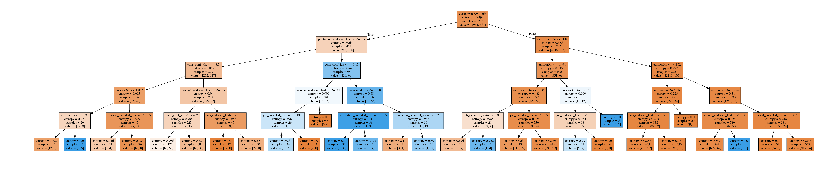

In [39]:
# show graph - do not delete/modify the code below this line
img_path = user_data_dir+'/Decision_Tree.png'
graph_big.write_png(img_path)

plt.figure(figsize=(14,18))
plt.imshow(plt.imread(img_path))
plt.axis('off')
plt.show() 

In [40]:
y_pred = dt5.predict(X_test)

In [41]:
accuracy = dt5.score(X_test,y_test)

print(accuracy)

precision = precision_score(y_test,y_pred)

print(precision)

recall = recall_score(y_test,y_pred)

print(recall)

f1 = f1_score(y_test,y_pred)

print(f1)

confusion_mat = confusion_matrix(y_test,y_pred)

print(confusion_mat)

0.8992718446601942
0.6296296296296297
0.18888888888888888
0.29059829059829057
[[724  10]
 [ 73  17]]


In [42]:
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_test,y_pred)
print(roc)

0.587632455343627


In [43]:
# save the model to disk
save_path = '/home/akash/greyatom/Hackathon_1/Portuguese_Bank/models/Decision_Tree_Entropy_Depth-5'
pickle.dump(dt5, open(save_path, 'wb'))